## Gather

In [1]:
import tweepy
import pprint
import pandas as pd
import numpy as np
import requests
import json
import time
from numpy import nan
import re
from datetime import datetime
import pandas_datareader as pdr
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
consumer_key = 
consumer_secret = 
access_token = 
access_secret = 

In [3]:
celgene_twitter_id = '325497645'
celgene_twitter_name = '@celgene'

In [5]:
def get_user_timeline(consumer_key,consumer_secret,access_token,access_secret,twitter_name,twitter_id):
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)
    api = tweepy.API(auth, wait_on_rate_limit = True,wait_on_rate_limit_notify =True)
    user_timeline = api.user_timeline(celgene_twitter_id)
    tweet_data = []
    for status in tweepy.Cursor(api.user_timeline,id=celgene_twitter_name).items():
        tweet_entry = {'tweet_id': status.id_str,'text':status.text,"source":status.source, "timestamp":status.created_at}
        tweet_data.append(tweet_entry)
    return tweet_data

celgene_tweet_data = get_user_timeline(consumer_key,consumer_secret,access_token,access_secret,celgene_twitter_name,celgene_twitter_id)

In [6]:
def pandas_df(data):
    return pd.DataFrame(data)

celgene_df = pandas_df(celgene_tweet_data)
celgene_df_clean = celgene_df.copy()

In [7]:
celgene_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3216 entries, 0 to 3215
Data columns (total 4 columns):
source       3216 non-null object
text         3216 non-null object
timestamp    3216 non-null datetime64[ns]
tweet_id     3216 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 100.6+ KB


In [8]:
celgene_df.head()

,source,text,timestamp,tweet_id
0,Sprinklr,Celgene announces plans to open the Thomas O. ...,2018-01-17 20:58:55,953733394428461058
1,Sprinklr,RT @LLSAdvocacy: Did you know that insurance t...,2018-01-11 13:06:54,951440281840291840
2,Twitter for iPhone,RT @MariaBartiromo: Big show tomorrow @Morning...,2018-01-09 11:17:02,950687854707073025
3,Sprinklr,Celgene to acquire @ImpactBioMed adding a JAK...,2018-01-07 23:03:32,950140878554849281
4,Sprinklr,"RT @CRUKresearch: In December 2017, we announc...",2018-01-05 15:05:55,949295906553257990


In [9]:
def grab_hashtags_date_handles(df):
    df['hashtags'] = df.text.str.findall(r'#.*?(?=\.?\s|$)')
    df['handles'] = df.text.str.findall(r'@.*?(?=\.?\s|$)')
    df['websites_in_text'] = df.text.str.findall('http\S+|www.\S+')
    df['date'] = df['timestamp'].dt.date
    df['date'] = pd.to_datetime(df['date'])
    return df

celgene_df = grab_hashtags_date_handles(celgene_df)
celgene_df.head()

,source,text,timestamp,tweet_id,hashtags,handles,websites_in_text,date
0,Sprinklr,Celgene announces plans to open the Thomas O. ...,2018-01-17 20:58:55,953733394428461058,[],[],[https://t.co/deuCG7qMwZ],2018-01-17
1,Sprinklr,RT @LLSAdvocacy: Did you know that insurance t...,2018-01-11 13:06:54,951440281840291840,[],[@LLSAdvocacy:],[],2018-01-11
2,Twitter for iPhone,RT @MariaBartiromo: Big show tomorrow @Morning...,2018-01-09 11:17:02,950687854707073025,[],"[@MariaBartiromo:, @MorningsMaria, @FoxBusines...",[],2018-01-09
3,Sprinklr,Celgene to acquire @ImpactBioMed adding a JAK...,2018-01-07 23:03:32,950140878554849281,[],[@ImpactBioMed],[https://t.co/FqJ5hO7T4A],2018-01-07
4,Sprinklr,"RT @CRUKresearch: In December 2017, we announc...",2018-01-05 15:05:55,949295906553257990,[],"[@CRUKresearch:, @Celgene,]",[],2018-01-05


In [10]:
# def write_data(tweet_data,file_name):
#     with open(file_name, 'w') as outfile:
#         json.dump(tweet_data,outfile)
# write_data(celgene_tweet_data,'celgene_data.txt')

In [11]:
#pip install pandas-datareader
#pct_change documentation = https://stackoverflow.com/questions/20000726/calculate-daily-returns-with-pandas-dataframe
def get_stock_history(symbols,df):
    stock_df = pdr.get_data_yahoo(symbols=symbols, start=df['timestamp'].iloc[-1].date(), end=df['timestamp'].iloc[0].date())
    stock_df.reset_index(inplace = True)
    stock_df['Percent_change'] =  stock_df.Close.pct_change()
    return stock_df

celgene_stock_df = get_stock_history('CELG',celgene_df)

In [12]:
celgene_stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Percent_change
0,2015-06-01,115.010002,116.019997,112.750000,114.449997,114.449997,4549400,NaN
1,2015-06-02,113.860001,114.919998,113.129997,113.879997,113.879997,2993800,-0.004980
2,2015-06-03,114.010002,114.459999,112.320000,112.680000,112.680000,4306500,-0.010537
3,2015-06-04,112.239998,112.800003,109.919998,110.919998,110.919998,5450400,-0.015619
4,2015-06-05,110.919998,111.000000,109.529999,110.720001,110.720001,4776200,-0.001803


In [13]:
def tweet_counts_stock_df(stock_df,df):
    value_counts_by_date = df.date.value_counts()
    value_counts_by_date = value_counts_by_date.to_frame()
    value_counts_by_date.reset_index(inplace=True)
    value_counts_by_date.columns = ['Date','Tweet_counts']
    value_counts_by_date_vol = pd.merge(value_counts_by_date,stock_df,on='Date',how='inner')
    value_counts_by_date_vol = value_counts_by_date_vol.sort_values('Date')
    value_counts_by_date_vol['positive'] = value_counts_by_date_vol.Percent_change > 0
    return value_counts_by_date_vol

tweet_counts_stock_df = tweet_counts_stock_df(celgene_stock_df,celgene_df)

In [14]:
tweet_counts_stock_df.head()

,Date,Tweet_counts,Open,High,Low,Close,Adj Close,Volume,Percent_change,positive
20,2015-06-01,26,115.010002,116.019997,112.750000,114.449997,114.449997,4549400,NaN,False
38,2015-06-02,13,113.860001,114.919998,113.129997,113.879997,113.879997,2993800,-0.004980,False
189,2015-06-03,4,114.010002,114.459999,112.320000,112.680000,112.680000,4306500,-0.010537,False
204,2015-06-04,4,112.239998,112.800003,109.919998,110.919998,110.919998,5450400,-0.015619,False
466,2015-06-05,1,110.919998,111.000000,109.529999,110.720001,110.720001,4776200,-0.001803,False


In [15]:
def most_n_tweet_dates(df):
    return df.sort_values('Tweet_counts',ascending = False)

dates_by_tweet_count = most_n_tweet_dates(tweet_counts_stock_df)

In [16]:
dates_by_tweet_count

,Date,Tweet_counts,Open,High,Low,Close,Adj Close,Volume,Percent_change,positive
0,2015-11-05,62,122.500000,122.500000,118.610001,120.459999,120.459999,8615100,-0.052764,False
1,2015-10-23,59,118.389999,120.900002,117.349998,120.080002,120.080002,4862800,0.024049,True
2,2016-04-27,58,107.900002,108.110001,105.820000,106.150002,106.150002,5908600,-0.013017,False
3,2016-09-29,55,105.830002,106.300003,102.279999,102.769997,102.769997,5545200,-0.028914,False
4,2016-10-25,49,98.099998,98.430000,96.930000,97.629997,97.629997,4768900,-0.004487,False
5,2016-11-17,48,119.639999,122.339996,119.250000,122.080002,122.080002,3990300,0.019968,True
6,2015-09-24,44,116.830002,116.919998,112.370003,113.879997,113.879997,7335900,-0.026999,False
7,2016-06-03,43,108.099998,108.320000,106.110001,107.589996,107.589996,3080700,-0.006005,False
8,2016-02-04,36,99.430000,103.690002,98.750000,101.930000,101.930000,7865200,0.024525,True
9,2015-11-13,36,109.019997,111.379997,107.330002,107.489998,107.489998,6206200,-0.014034,False


In [17]:
#dates_by_tweet_count
def top_n_tweet_days(df,n):
    return df.head(n)

top_20_tweet_days = top_n_tweet_days(dates_by_tweet_count,20)

In [18]:
top_20_tweet_days

,Date,Tweet_counts,Open,High,Low,Close,Adj Close,Volume,Percent_change,positive
0,2015-11-05,62,122.500000,122.500000,118.610001,120.459999,120.459999,8615100,-0.052764,False
1,2015-10-23,59,118.389999,120.900002,117.349998,120.080002,120.080002,4862800,0.024049,True
2,2016-04-27,58,107.900002,108.110001,105.820000,106.150002,106.150002,5908600,-0.013017,False
3,2016-09-29,55,105.830002,106.300003,102.279999,102.769997,102.769997,5545200,-0.028914,False
4,2016-10-25,49,98.099998,98.430000,96.930000,97.629997,97.629997,4768900,-0.004487,False
5,2016-11-17,48,119.639999,122.339996,119.250000,122.080002,122.080002,3990300,0.019968,True
6,2015-09-24,44,116.830002,116.919998,112.370003,113.879997,113.879997,7335900,-0.026999,False
7,2016-06-03,43,108.099998,108.320000,106.110001,107.589996,107.589996,3080700,-0.006005,False
8,2016-02-04,36,99.430000,103.690002,98.750000,101.930000,101.930000,7865200,0.024525,True
9,2015-11-13,36,109.019997,111.379997,107.330002,107.489998,107.489998,6206200,-0.014034,False


In [19]:
#df = dates_by_tweet_count
def top_n_tweet_day_plot(n,df):
    top_n_tweet_day = top_n_tweet_days(df,n)
    top_n_tweet_day.plot(kind='bar', x=top_n_tweet_day.index,y='Tweet_counts')
    return top_n_tweet_days

<function __main__.top_n_tweet_days>

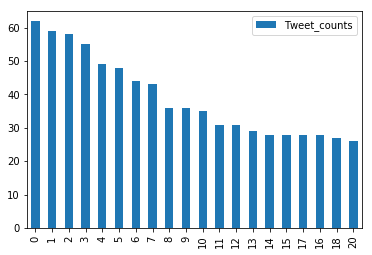

In [20]:
top_n_tweet_day_plot(20,dates_by_tweet_count)

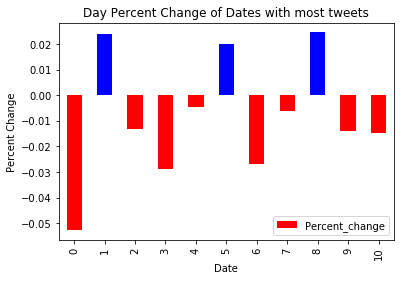

In [22]:
#df = dates_by_tweet_count

def pos_neg_change_n_most_tweets(df,n):
    top_n_tweet_day = top_n_tweet_days(df,n)
    ax = top_n_tweet_day.plot(kind='bar',color=top_n_tweet_day.positive.map({True:'b',False:'r'}),x=top_n_tweet_day.index,y='Percent_change')
    ax.set_title('Day Percent Change of Dates with most tweets')
    ax.set_xlabel('Date')
    ax.set_ylabel('Percent Change')
    
pos_neg_change_n_most_tweets(dates_by_tweet_count,11)

In [25]:
dates_by_tweet_count['Tweet_counts'].corr(dates_by_tweet_count['Percent_change'])

-0.045081976663037066

In [26]:
dates_by_tweet_count['Volume'].corr(dates_by_tweet_count['Percent_change'])

-0.24010086853969753

In [27]:
dates_by_tweet_count['Tweet_counts'].corr(dates_by_tweet_count['Volume'])

0.015838788003478241